In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from nltk.probability import FreqDist
import nltk

In [2]:
df  = pd.read_csv("spam.csv", encoding='latin')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df = df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [5]:
df.duplicated().sum()

403

In [6]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [7]:
df.drop_duplicates(inplace=True)

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_68136\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.columns = ['label','email']
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# label encoding

from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

df['en_label'] = encoder.fit_transform(df.label)
df.head()

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_68136\3123141392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['en_label'] = encoder.fit_transform(df.label)


,label,email,en_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Analysis

In [13]:
df['len_email'] = df.email.apply(len)
df.head()

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_68136\1005394676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len_email'] = df.email.apply(len)


,label,email,en_label,len_email
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


<AxesSubplot:xlabel='len_email', ylabel='Count'>

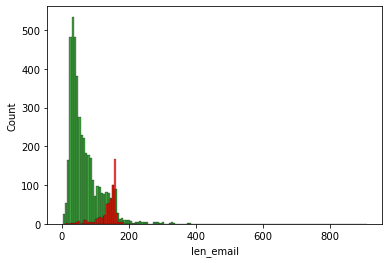

In [14]:
sns.histplot((df[df.label=='ham']['len_email']),color= "green")
sns.histplot((df[df.label=='spam']['len_email']),color='red')

In [15]:
from nltk.stem import PorterStemmer,LancasterStemmer, WordNetLemmatizer
import re

from nltk.corpus import stopwords

In [16]:
pst = PorterStemmer()
stop_words = stopwords.words('english')

In [17]:
text = "This is just for Checking $$%4 635 the function>> ? "

In [18]:
def text_cleaner(text):
    # Lowering the text
    lower = text.lower()
    
    # removing special character, punctuation, number
    alpha = re.sub("[^a-z]", " ", lower)
    
    # creating the token
    token = nltk.word_tokenize(alpha)
    
    # removing the stopword
    stop_rem = [word for word in token if word not in stop_words]
    
    # stemming operation
    stemming =[pst.stem(word) for word in stop_rem ]
    
    
    # cleaned_text
    cleaned_text = " ".join(stemming)
    
    return cleaned_text
    

In [19]:
text_cleaner(text)

'check function'

In [20]:
df.head()

,label,email,en_label,len_email
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [21]:
df['clean'] = df.email.apply(text_cleaner)
df.head()

C:\Users\Pradeep\AppData\Local\Temp\ipykernel_68136\3682641886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean'] = df.email.apply(text_cleaner)


,label,email,en_label,len_email,clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,0,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goe usf live around though


In [22]:
ham = df[df.en_label==0]
spam = df[df.en_label==1]

corpus_ham = ' '.join(list(ham.clean))
corpus_spam = ' '.join(list(spam.clean))


ham_token = nltk.word_tokenize(corpus_ham)
spam_token = nltk.word_tokenize(corpus_spam)

In [23]:
print(ham_token)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'way', 'u', 'feel', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', 'month', 'ha', 'ha', 'joke', 'pay', 'first

In [24]:
print(spam_token)

['free', 'entri', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', 'st', 'may', 'text', 'fa', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', 'freemsg', 'hey', 'darl', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hour', 'mobil', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', 'six', 'chanc', 'win', 'cash', 'pound', 'txt', 'csh', 'send', 'cost', 'p', 'day', 'day', 'tsandc', 'appli', 'repli', 'hl', 'info', 'urgent', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', 'c', 'www', 'dbuk', 'net', 'lccltd', 'pobox', 'ldnw', 'rw', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click', 'http', 'wap', 'xxxmobilemovieclub', 'com', 'n', 'qjkgighjjgcbl', 'engl

In [25]:
spam = FreqDist(spam_token).most_common(30)
spam

[('call', 346),
 ('free', 197),
 ('p', 158),
 ('u', 157),
 ('txt', 152),
 ('text', 129),
 ('mobil', 121),
 ('ur', 119),
 ('stop', 114),
 ('repli', 104),
 ('claim', 98),
 ('prize', 85),
 ('www', 83),
 ('min', 78),
 ('get', 75),
 ('tone', 73),
 ('cash', 65),
 ('servic', 65),
 ('new', 64),
 ('uk', 63),
 ('nokia', 62),
 ('send', 61),
 ('msg', 61),
 ('urgent', 58),
 ('win', 57),
 ('c', 56),
 ('award', 56),
 ('contact', 56),
 ('week', 55),
 ('phone', 53)]

In [26]:
ham = FreqDist(ham_token).most_common(30)
ham

[('u', 922),
 ('go', 409),
 ('get', 358),
 ('gt', 288),
 ('lt', 287),
 ('come', 277),
 ('ok', 255),
 ('call', 240),
 ('got', 239),
 ('like', 236),
 ('know', 236),
 ('time', 225),
 ('love', 225),
 ('day', 218),
 ('good', 216),
 ('want', 210),
 ('ur', 198),
 ('need', 174),
 ('one', 165),
 ('lor', 159),
 ('home', 156),
 ('think', 150),
 ('take', 148),
 ('see', 147),
 ('still', 145),
 ('da', 143),
 ('k', 138),
 ('tell', 135),
 ('make', 130),
 ('today', 129)]

In [27]:
X = df.clean
X

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: clean, Length: 5169, dtype: object

In [28]:
y = df.en_label
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: en_label, Length: 5169, dtype: int32

In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [101]:
tfidf = TfidfVectorizer(max_features=3000)
X1 = tfidf.fit_transform(X)
X1

<5169x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 37875 stored elements in Compressed Sparse Row format>

In [88]:
X1  = X1.toarray()
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
tfidf.vocabulary_

{'go': 1067,
 'point': 1939,
 'crazi': 574,
 'avail': 186,
 'bugi': 356,
 'great': 1098,
 'world': 2922,
 'la': 1396,
 'buffet': 355,
 'cine': 471,
 'got': 1086,
 'wat': 2835,
 'ok': 1801,
 'lar': 1408,
 'joke': 1347,
 'wif': 2883,
 'oni': 1810,
 'free': 985,
 'entri': 818,
 'wkli': 2906,
 'comp': 515,
 'win': 2888,
 'fa': 877,
 'cup': 595,
 'final': 930,
 'tkt': 2635,
 'st': 2426,
 'may': 1573,
 'text': 2579,
 'receiv': 2088,
 'question': 2043,
 'std': 2442,
 'txt': 2707,
 'rate': 2065,
 'appli': 134,
 'dun': 758,
 'say': 2215,
 'earli': 763,
 'hor': 1199,
 'alreadi': 86,
 'nah': 1709,
 'think': 2600,
 'goe': 1070,
 'usf': 2769,
 'live': 1467,
 'around': 154,
 'though': 2607,
 'freemsg': 988,
 'hey': 1168,
 'darl': 617,
 'week': 2853,
 'word': 2919,
 'back': 201,
 'like': 1453,
 'fun': 1010,
 'still': 2449,
 'tb': 2552,
 'xxx': 2958,
 'chg': 453,
 'send': 2251,
 'rcv': 2068,
 'even': 839,
 'brother': 341,
 'speak': 2402,
 'treat': 2682,
 'aid': 62,
 'per': 1886,
 'request': 2127,
 'me

In [89]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=2)

In [91]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [92]:
pred = mnb.predict(X_test)

In [93]:
confusion_matrix(y_test, pred)

array([[896,   0],
       [ 27, 111]], dtype=int64)

In [94]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       1.00      0.80      0.89       138

    accuracy                           0.97      1034
   macro avg       0.99      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [95]:
# precision = TP/(TP+FP)
# here precision in very important, coz we dont want any normal email to be classifed as spam email, 
# Hence, we are going to select the model which having large value of the precision

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [98]:
confusion_matrix(y_test, pred_rf)

array([[894,   2],
       [ 23, 115]], dtype=int64)

In [99]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       0.98      0.83      0.90       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.97      1034



In [ ]:
1. text_cleaner
2. tfidf
3. model --> mnb

In [119]:
email = 'i Tried to call you, call me urgently regarding the study 3536`43%%'

In [120]:
cleaned_email = text_cleaner(email)
cleaned_email

'tri call call urgent regard studi'

In [121]:
transformed = tfidf.transform([cleaned_email]).toarray()
transformed

array([[0., 0., 0., ..., 0., 0., 0.]])

In [122]:
mnb.predict(transformed)

array([0])

In [123]:
import pickle

In [ ]:
dump -->  save the trained model  'wb'--> write binary
load -->  to  start the saved trained model --> 'rb' --> read binary

In [124]:
pickle.dump(mnb, open('model_mnb.pkl','wb') )

In [125]:
pickle.dump(tfidf, open('tfidf.pkl','wb') )